In [ ]:
!pip install pytrends


Fetching 'inflation' for period:2023-04-07 2024-01-01
Fetching 'inflation' for period:2022-10-20 2023-07-16
Normalize by overlapping period:2023-04-07 2023-07-16
Fetching 'inflation' for period:2022-05-04 2023-01-28
Normalize by overlapping period:2022-10-20 2023-01-28
Fetching 'inflation' for period:2021-11-16 2022-08-12
Normalize by overlapping period:2022-05-04 2022-08-12
Fetching 'inflation' for period:2021-05-31 2022-02-24
Normalize by overlapping period:2021-11-16 2022-02-24
Fetching 'inflation' for period:2020-12-13 2021-09-08
Normalize by overlapping period:2021-05-31 2021-09-08
Fetching 'inflation' for period:2020-06-27 2021-03-23
Normalize by overlapping period:2020-12-13 2021-03-23
Fetching 'inflation' for period:2020-01-10 2020-10-05
Normalize by overlapping period:2020-06-27 2020-10-05
Fetching 'inflation' for period:2019-07-25 2020-04-19
Normalize by overlapping period:2020-01-10 2020-04-19
Fetching 'inflation' for period:2019-02-06 2019-11-02
Normalize by overlapping per

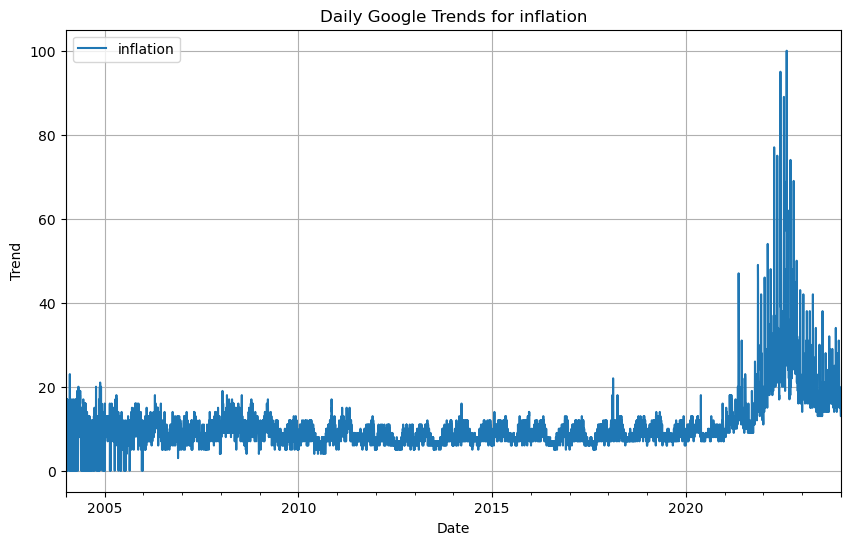

In [ ]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
#gtrend.py in separate file
from gtrend import get_daily_trend

# set up pytrends TrendReq object
pytrend = TrendReq(hl='en-US')

keyword = 'inflation'
start = '2004-01-01'
end = '2024-01-01'
geo = 'US'
cat = 0
gprop = ''

# get_daily_trend function
overlapping = get_daily_trend(pytrend, keyword, start, end, geo=geo, cat=cat, gprop=gprop, verbose=True, tz=0)

overlapping.plot(y=keyword, figsize=(10, 6))
plt.title('Daily Google Trends for inflation')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.grid(True)
plt.show()

In [ ]:
overlapping

,inflation,overlap
date,,
2004-01-01,0.0,1.0
2004-01-02,11.0,1.0
2004-01-03,0.0,1.0
2004-01-04,0.0,1.0
2004-01-05,0.0,1.0
...,...,...
2023-12-28,16.0,NaN
2023-12-29,14.0,NaN
2023-12-30,13.0,NaN


In [ ]:
overlapping.describe()

,inflation,overlap
count,7306.000000,4281.0
mean,11.031755,1.0
std,6.367317,0.0
min,0.000000,1.0
25%,8.000000,1.0
50%,10.000000,1.0
75%,12.000000,1.0
max,100.000000,1.0


# Generalized for all terms

## US

In [ ]:
start = '2004-01-01'
end = '2024-01-01'
geo = 'US'
cat = 0
gprop = ''
terms = ['inflation', 'price', 'CPI', 'cheap', 'buy', 'spend', 'save', 'donate', 'job', 'vacation', 'foreclosure', 'cash', 'credit', 'ATM']

us_terms = pd.DataFrame(index=pd.date_range(start=start, end=end))

for term in terms:
    # get_daily_trend function
    df = get_daily_trend(pytrend, term, start, end, geo=geo, cat=cat, gprop=gprop, verbose=True, tz=0)
    # rename the column to the term name
    df.rename(columns={'overlap': term}, inplace=True)
    us_terms = pd.merge(us_terms, df[term], how='left', left_index=True, right_index=True)

us_terms

Fetching 'inflation' for period:2023-04-07 2024-01-01
Fetching 'inflation' for period:2022-10-20 2023-07-16
Normalize by overlapping period:2023-04-07 2023-07-16
Fetching 'inflation' for period:2022-05-04 2023-01-28
Normalize by overlapping period:2022-10-20 2023-01-28
Fetching 'inflation' for period:2021-11-16 2022-08-12
Normalize by overlapping period:2022-05-04 2022-08-12
Fetching 'inflation' for period:2021-05-31 2022-02-24
Normalize by overlapping period:2021-11-16 2022-02-24
Fetching 'inflation' for period:2020-12-13 2021-09-08
Normalize by overlapping period:2021-05-31 2021-09-08
Fetching 'inflation' for period:2020-06-27 2021-03-23
Normalize by overlapping period:2020-12-13 2021-03-23
Fetching 'inflation' for period:2020-01-10 2020-10-05
Normalize by overlapping period:2020-06-27 2020-10-05
Fetching 'inflation' for period:2019-07-25 2020-04-19
Normalize by overlapping period:2020-01-10 2020-04-19
Fetching 'inflation' for period:2019-02-06 2019-11-02
Normalize by overlapping per

,inflation,inflation,price,price,CPI,CPI,cheap,cheap,buy,buy,...,vacation,vacation,foreclosure,foreclosure,cash,cash,credit,credit,ATM,ATM
2004-01-01,0.0,1.0,33.0,1.0,0.0,1.0,76.0,1.0,27.0,1.0,...,81.0,1.0,0.0,1.0,10.0,1.0,27.0,1.0,0.0,1.0
2004-01-02,11.0,1.0,29.0,1.0,0.0,1.0,66.0,1.0,24.0,1.0,...,78.0,1.0,23.0,1.0,12.0,1.0,37.0,1.0,0.0,1.0
2004-01-03,0.0,1.0,29.0,1.0,0.0,1.0,69.0,1.0,27.0,1.0,...,70.0,1.0,24.0,1.0,13.0,1.0,31.0,1.0,0.0,1.0
2004-01-04,0.0,1.0,27.0,1.0,0.0,1.0,75.0,1.0,24.0,1.0,...,75.0,1.0,0.0,1.0,14.0,1.0,26.0,1.0,0.0,1.0
2004-01-05,0.0,1.0,28.0,1.0,0.0,1.0,86.0,1.0,22.0,1.0,...,78.0,1.0,0.0,1.0,9.0,1.0,27.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28,16.0,NaN,56.0,NaN,5.0,NaN,38.0,NaN,23.0,NaN,...,30.0,NaN,11.0,NaN,37.0,NaN,53.0,NaN,61.0,NaN
2023-12-29,14.0,NaN,52.0,NaN,5.0,NaN,37.0,NaN,24.0,NaN,...,29.0,NaN,10.0,NaN,36.0,NaN,57.0,NaN,62.0,NaN
2023-12-30,13.0,NaN,44.0,NaN,3.0,NaN,39.0,NaN,25.0,NaN,...,27.0,NaN,8.0,NaN,35.0,NaN,44.0,NaN,77.0,NaN
2023-12-31,13.0,NaN,40.0,NaN,3.0,NaN,33.0,NaN,23.0,NaN,...,31.0,NaN,6.0,NaN,30.0,NaN,33.0,NaN,56.0,NaN


In [ ]:
from pytrends.request import TrendReq
import pandas as pd
from gtrend import get_daily_trend

# pytrends TrendReq object
pytrend = TrendReq(hl='en-US')

start = '2004-01-01'
end = '2024-01-01'
geo = 'US'
cat = 0
gprop = ''
terms = ['inflation', 'price', 'CPI', 'cheap', 'buy', 'spend', 'save', 'donate', 'job', 'vacation', 'foreclosure', 'cash', 'credit', 'ATM']

us_terms = pd.DataFrame(index=pd.date_range(start=start, end=end))

for term in terms:
    # get_daily_trend function
    df = get_daily_trend(pytrend, term, start, end, geo=geo, cat=cat, gprop=gprop, verbose=True, tz=0)
    df.drop(columns=['overlap'], inplace=True)
    df.rename(columns={'overlap': term}, inplace=True)
    us_terms = pd.merge(us_terms, df, how='left', left_index=True, right_index=True)

us_terms


Fetching 'inflation' for period:2023-04-07 2024-01-01
Fetching 'inflation' for period:2022-10-20 2023-07-16
Normalize by overlapping period:2023-04-07 2023-07-16
Fetching 'inflation' for period:2022-05-04 2023-01-28
Normalize by overlapping period:2022-10-20 2023-01-28
Fetching 'inflation' for period:2021-11-16 2022-08-12
Normalize by overlapping period:2022-05-04 2022-08-12
Fetching 'inflation' for period:2021-05-31 2022-02-24
Normalize by overlapping period:2021-11-16 2022-02-24
Fetching 'inflation' for period:2020-12-13 2021-09-08
Normalize by overlapping period:2021-05-31 2021-09-08
Fetching 'inflation' for period:2020-06-27 2021-03-23
Normalize by overlapping period:2020-12-13 2021-03-23
Fetching 'inflation' for period:2020-01-10 2020-10-05
Normalize by overlapping period:2020-06-27 2020-10-05
Fetching 'inflation' for period:2019-07-25 2020-04-19
Normalize by overlapping period:2020-01-10 2020-04-19
Fetching 'inflation' for period:2019-02-06 2019-11-02
Normalize by overlapping per

,inflation,price,CPI,cheap,buy,spend,save,donate,job,vacation,foreclosure,cash,credit,ATM
2004-01-01,0.0,33.0,0.0,76.0,27.0,0.0,18.0,0.0,18.0,77.0,0.0,10.0,32.0,0.0
2004-01-02,11.0,29.0,0.0,64.0,24.0,0.0,16.0,18.0,27.0,75.0,22.0,12.0,44.0,0.0
2004-01-03,0.0,29.0,0.0,70.0,27.0,0.0,15.0,14.0,24.0,66.0,30.0,13.0,37.0,0.0
2004-01-04,0.0,26.0,0.0,75.0,24.0,0.0,15.0,0.0,26.0,72.0,0.0,14.0,32.0,0.0
2004-01-05,0.0,28.0,0.0,90.0,22.0,0.0,18.0,0.0,29.0,74.0,0.0,9.0,32.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28,16.0,56.0,5.0,37.0,24.0,64.0,29.0,29.0,18.0,30.0,10.0,38.0,52.0,61.0
2023-12-29,14.0,52.0,4.0,37.0,25.0,63.0,28.0,28.0,17.0,29.0,9.0,38.0,56.0,62.0
2023-12-30,13.0,44.0,2.0,38.0,25.0,58.0,29.0,26.0,14.0,27.0,8.0,37.0,44.0,77.0
2023-12-31,13.0,40.0,2.0,32.0,24.0,60.0,30.0,25.0,12.0,31.0,6.0,31.0,32.0,56.0


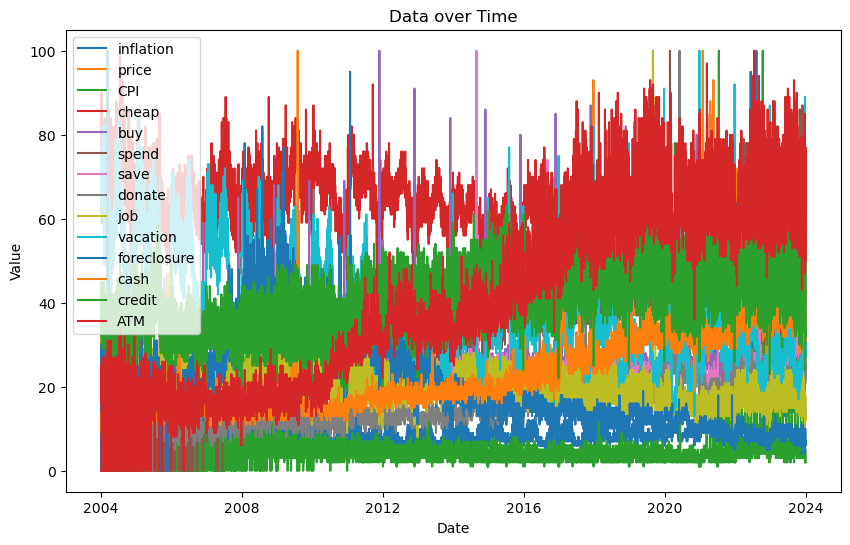

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

us_terms.index = pd.to_datetime(us_terms.index)

plt.figure(figsize=(10, 6))
for column in us_terms.columns:
    plt.plot(us_terms.index, us_terms[column], label=column)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Data over Time')
plt.legend()
plt.show()


## China

In [ ]:
terms = ['通货膨胀', '价格', '消费物价指数', '便宜', '购买', '花費', '保存', '捐', '工作', '放假', '赎', '现金', '信用', '自動取款機']
chinese_terms = pd.DataFrame(index=pd.date_range(start=start, end=end))

for term in terms:
    # get_daily_trend function
    df = get_daily_trend(pytrend, term, start, end, geo=geo, cat=cat, gprop=gprop, verbose=True, tz=0)
    # rename the column to the term name
    df.rename(columns={'overlap': term}, inplace=True)
    us_terms = pd.merge(us_terms, df[term], how='left', left_index=True, right_index=True)

chinese_terms

In [ ]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)

kw_list = ["通货膨胀"]
pytrends.build_payload(kw_list, timeframe='2004-01-01 2024-01-01')

historical_data = pytrends.interest_over_time()
historical_data


,通货膨胀,isPartial
date,,
2004-01-01,21,False
2004-02-01,41,False
2004-03-01,80,False
2004-04-01,83,False
2004-05-01,70,False
...,...,...
2023-09-01,4,False
2023-10-01,4,False
2023-11-01,4,False


In [ ]:
from pytrends.request import TrendReq
import pandas as pd

pytrends = TrendReq(hl='en-US', tz=360)

terms = ['通货膨胀', '价格', '消费物价指数', '便宜', '购买', '花費', '保存', '捐', '工作', '放假', '赎', '现金', '信用', '自動取款機']

dfs = []

for term in terms:
    pytrends.build_payload([term], timeframe='2004-01-01 2024-01-01')

    historical_data = pytrends.interest_over_time()

    historical_data.rename(columns={'{}'.format(term): '{}'.format(term)}, inplace=True)

    dfs.append(historical_data)

china = pd.concat(dfs, axis=1)

china.drop(columns='isPartial', inplace=True)

china

,通货膨胀,价格,消费物价指数,便宜,购买,花費,保存,捐,工作,放假,赎,现金,信用,自動取款機
date,,,,,,,,,,,,,,
2004-01-01,23,63,0,100,85,0,46,7,65,22,0,57,85,0
2004-02-01,31,89,0,65,99,0,46,11,79,2,0,93,96,0
2004-03-01,71,83,100,65,87,0,44,9,67,3,0,97,97,0
2004-04-01,81,84,0,59,88,0,47,15,66,25,0,95,100,0
2004-05-01,63,81,0,58,94,0,51,19,66,3,0,90,99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,4,4,0,26,8,75,89,8,11,7,2,9,43,0
2023-10-01,4,4,0,27,8,81,91,8,10,7,3,9,41,0
2023-11-01,4,4,0,27,9,75,83,9,11,3,2,9,43,0


/Users/yifanwang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yifanwang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36135 (\N{CJK UNIFIED IDEOGRAPH-8D27}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yifanwang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33192 (\N{CJK UNIFIED IDEOGRAPH-81A8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yifanwang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32960 (\N{CJK UNIFIED IDEOGRAPH-80C0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yifanwang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20215 (\N{CJK UNIF

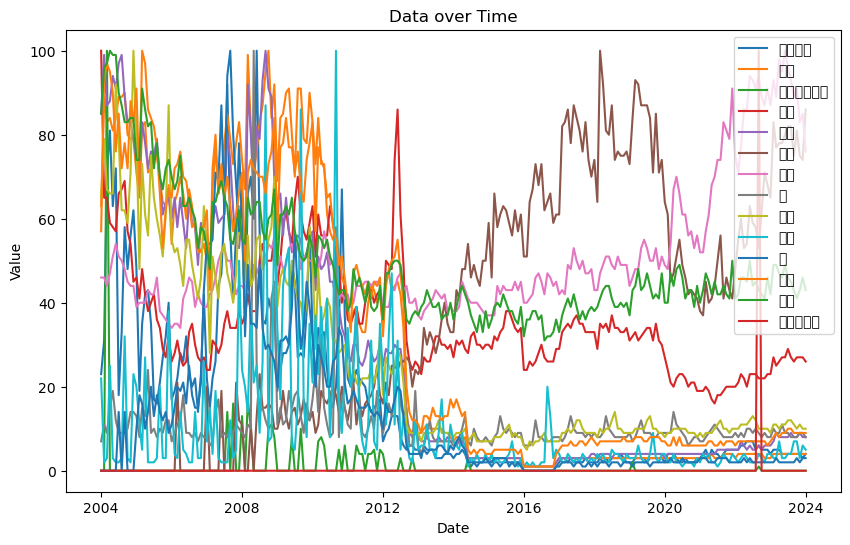

In [ ]:
china.index = pd.to_datetime(china.index)

plt.figure(figsize=(10, 6))
for column in china.columns:
    plt.plot(china.index, china[column], label=column)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Data over Time')
plt.legend()
plt.show()
